<a href="https://colab.research.google.com/github/klopetx/PHM_tutorial/blob/main/src/04_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

project_path = 'PHM_tutorial'

if not os.path.isdir(project_path):

  username = 'klopetx'
  repo = project_path

  !git clone https://@github.com/{username}/{repo}

os.chdir(project_path)

!python src/00_Environment_Checks.py

indicator_file_path = "data/indicators.csv"

if not os.path.isdir(project_path):
  print('Indicator dataset not found, extracting indicators...')
  !python src/01_Indicator_extraction.py
  print('Indicators extracted succesfully!')


Cloning into 'PHM_tutorial'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 104 (delta 55), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 3.29 MiB | 8.56 MiB/s, done.
Resolving deltas: 100% (55/55), done.
The '10. FEMTO Bearing' directory does not exist inside 'data'
Runnning data download...
FEMTO downloaded
Indicator dataset not found, extracting indicators...
Indicators extracted succesfully!


# Modelling

After carrying out the acquisition, the feature extraction and the selection, it is time to build a model.

As we have seen in the slides, there are different approaches we might take which, **most of the times it is not about what we want to do** but about **what we can do with the data we have at hand**.  

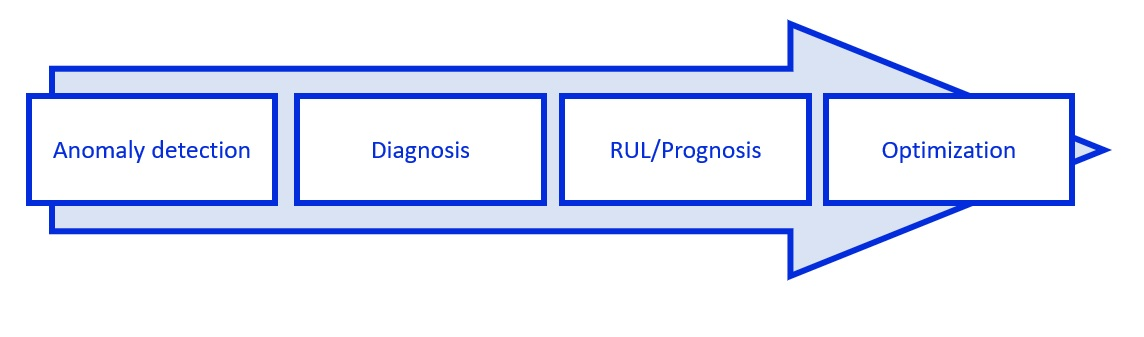


## Questions
Given the dataset we have been working with. In each question, justify the answer in relation to the data available an how it should be treated in order to have the right data to solve the problem.

How would you codify the data?

1. Do you think we could carry out **an anomaly detection model**? (Justify your answer)

2. Do you think we could carry out **a diagnosis model**? Of which kind?

3. A **Remaining Useful Life model**?

4. An **optimization model**?





# Remaining Useful Life

As we saw in the previous notebook, our data extraction process has been oriented towards the developmento of a Remaining Useful Life model.
This type of model would provide us an estimation of the time left until the machine is no longer operating at any time we request that information.

For computing the RUL we need some run-to-failure examples. That is, data taken trhough the whole life of the machine that reflects how the signals evolved till the machine is no longer operable.

Luckily for you, you have a dataset ready for building a Remaining Useful Life computation.

This time, we will:

0) Visualize how RUL behaves

1) Split the data

2) Train a model (Linear Regression could be a good start)

3) Plot the results over the




In [7]:
os.getcwd()

'/content/PHM_tutorial'

In [9]:
import pandas as pd

indicators = pd.read_csv('data/indicators.csv', sep = '\t')



## RUL behaviour

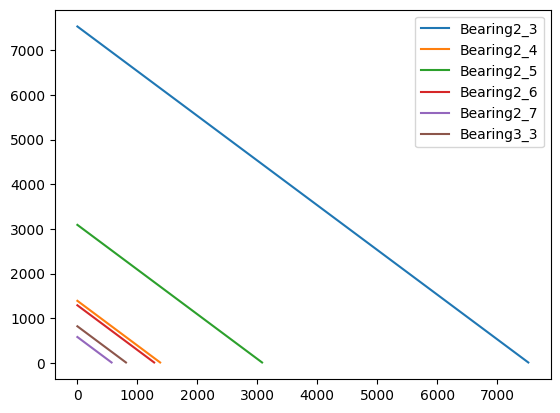

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

indicators = indicators[indicators.Alive == True].copy()

groups = indicators.groupby('Bearing')

for name, group in groups:
    plt.plot(group['Duration'],group['RUL'], label=name)

plt.legend()
plt.show()


In [11]:
indicators.columns

Index(['Origin', 'Bearing', 'OperatingCondition', 'TestNumber', 'TestIdx',
       'Hour', 'Minute', 'Second', 'Mili/centisecond', 'Mean',
       'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness',
       'Kurtosis', 'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms', 'Timestamp', 'Duration', 'Actual_RUL', 'RUL',
       'Alive'],
      dtype='object')

## Spliting the data

To ensure our model has some predictive power, let's split first the data, if we leave some data "unseen" so that we can validate later that the model "generalises" well.
Bearing in mind what information you want the model to be able to see!



Things you need to do:
- Select the variables to be used in the partitioning
- Create train and test partition

Useful commands:
- pd.columns
- pd.head
- pd.iloc and pd.loc
- sikitlearn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)



In [12]:
import numpy as np

from sklearn.model_selection import train_test_split

actual_indicators = ['Mean',
       'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness',
       'Kurtosis', 'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms']

target_variable = ['RUL']

In [13]:
X = indicators[actual_indicators]
y = indicators[target_variable]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Building a model

The backbone of our RUL estimation is a data-based model.

This  model should take indicators as inputs and be able to provide an estimation of the RUL.

I would suggest to use a multiple linear regression. You can check [sikitlearn's docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#examples-using-sklearn-linear-model-linearregression) for more details.

In [15]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression().fit(X_train, y_train)

In [16]:
linearModel.score(X_train, y_train)

0.6304268638537007

## Model validation

Now use the model you trained over the unseen data and visualize the results.
How good is the RUL model?

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

y_predicted = linearModel.predict(X_test)

print(r2_score(y_train, linearModel.predict(X_train)))
r2_score(y_test, y_predicted)


0.6304268638537007


0.5031007047726239

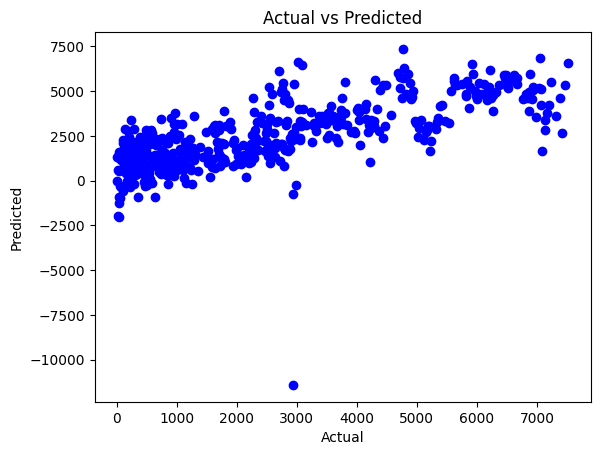

In [18]:
import matplotlib.pyplot as plt


plt.scatter(y_test, y_predicted, color='blue')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()